# Use Case : Cluster of Automobile Dataset

Use Case *Clustering* yang akan dilakukan pada Automobile Dataset adalah dengan menggunakan variabel 'peak-rpm' dan 'price' menggunakan tiga metode Unsupervise (*Clustering*) : K-Means, Hierarchical dan DSCAN

In [156]:
# Import the Library
import pandas as pd
import numpy as np

In [157]:
# Normalized losses in uses as compared to other cars
df = pd.read_csv('Automobile/dataframe.csv')
df = df.drop(['ID'],axis=1)
df.head()

,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,122.0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,122.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [159]:
df = df[['peak-rpm', 'price']]
df.head()

,peak-rpm,price
0,5000.0,13495.0
1,5000.0,16500.0
2,5000.0,16500.0
3,5500.0,13950.0
4,5500.0,17450.0


In [160]:
df.corr()

,peak-rpm,price
peak-rpm,1.000000,-0.098803
price,-0.098803,1.000000


Mengetahui karakteristik data yang akan di *clustering*

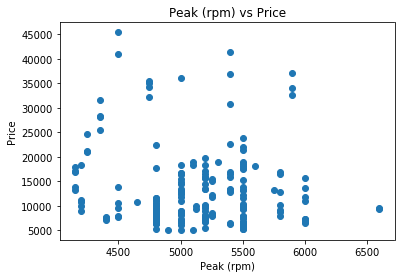

In [162]:
import matplotlib.pyplot as plt 
## Show the Graph 
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Peak (rpm)")
plt.ylabel("Price")
plt.title("Peak (rpm) vs Price")
plt.show()

## K-Means

In [158]:
from sklearn.cluster import KMeans

In [161]:
X = np.asarray(df)

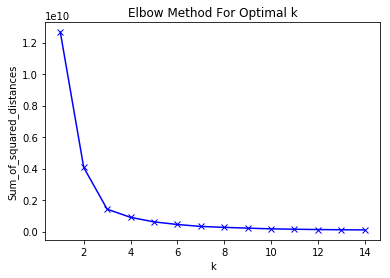

In [163]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [164]:
range_n_clusters = [2, 3, 4, 5]
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters = n_cluster, max_iter =1000)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    from sklearn.metrics import silhouette_score
    silhouette_avg = silhouette_score(X, labels)
    print(silhouette_avg)

0.71609117547344
0.639842907527281
0.5705100648607953
0.5759795891590495


Based on Scree Plot and Silhouette we can know the best of K- value is 2

In [165]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [166]:
print(kmeans.cluster_centers_)

[[ 4950.         30585.12      ]
 [ 5147.76949115 10806.00847717]]


In [167]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]


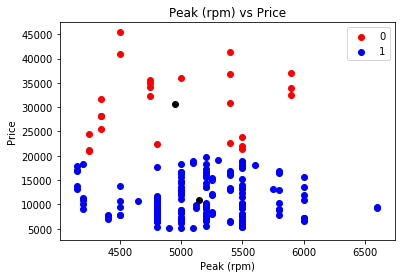

In [168]:
x = X[:,0]
x1 = X[:,1]
group = kmeans.labels_
color = ['red', 'blue']
fig, ax = plt.subplots()
for g in set (kmeans.labels_):
    xa = [x[j] for j in range (len(x)) if group[j]==g] 
    xb = [x1[j] for j in range (len(x1)) if group[j]==g]
    ax.scatter(xa, xb, c=color[g], label=g)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
ax.legend()
plt.xlabel("Peak (rpm)")
plt.ylabel("Price")
plt.title("Peak (rpm) vs Price")
plt.show()

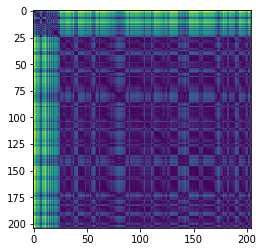

In [169]:
data_clustered = pd.DataFrame(X)
data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered = data_clustered.sort_values('cluster')
data_clustered = np.asarray(data_clustered)
from scipy.spatial.distance import cdist
dist = cdist(data_clustered[:,0:2],data_clustered[:,0:2], metric='euclidean')
plt.imshow(dist)
plt.show()

## Hierarchical Cluster

In [170]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

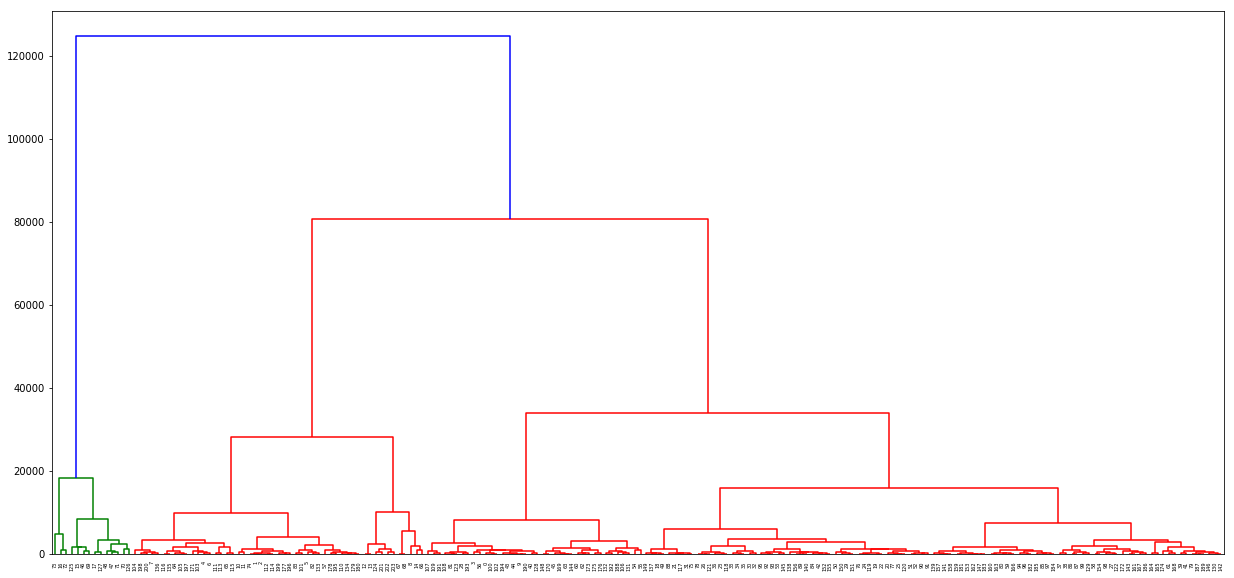

In [171]:
plt.figure(figsize=(21,10))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [172]:
# Fitting hierarchical clustering 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

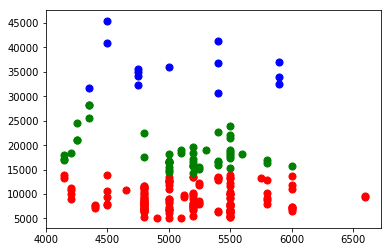

In [173]:
# Mengeplot Data setelah dilakukan hierarchical clustering
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
x = X[:,0]
x1 = X[:,1]
x2 = X[:,1]

## DBSCAN

In [174]:
from sklearn.cluster import DBSCAN
from sklearn import datasets

In [191]:
dbscan = DBSCAN(eps=5000, min_samples=10)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=5000, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=1, p=None)

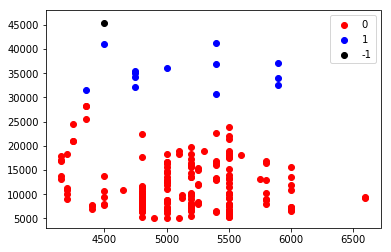

In [193]:
x = X[:,0]
x1 = X[:,1]
group = dbscan.labels_
color = ['red', 'blue', 'black']
fig, ax = plt.subplots()
for g in set (dbscan.labels_):
    xa = [x[j] for j in range (len(x)) if group[j]==g] 
    xb = [x1[j] for j in range (len(x1)) if group[j]==g]
    ax.scatter(xa, xb, c=color[g], label=g)
ax.legend()
plt.show()

## RESULT

In [179]:
df['K-Means'] = pd.DataFrame(kmeans.labels_)
df['Hierarchical'] = pd.DataFrame(model.labels_)
df['DBSCAN'] = pd.DataFrame(dbscan.labels_)
df.head()

,peak-rpm,price,K-Means,Hierarchical,DBSCAN
0,5000.0,13495.0,1,0,0
1,5000.0,16500.0,1,2,0
2,5000.0,16500.0,1,2,0
3,5500.0,13950.0,1,0,0
4,5500.0,17450.0,1,2,0


1. Berapa cluster yang Anda buat? Anda menggunakan atribut/feature apa saja?
<br> *Clustering* yang digunakan ada 3, yaitu : K-Means, Hierarchical dan DBSCAN
Atribut / feature yang digunakan dalam analisis yaitu dua variabel numerik yang memiliki korelasi negatif dan terkecil jika dibandingkan dengan korelasi antar dua variabel lainnya. Kedua variabel tersebut adalah peak(rpm) dan price. Sehingga ingin mengetahui *Clustering* kendaraan berdarsakan peak rpm tertinggi dengan price.
<br>
<br>
2. Manakah algoritma clustering yang Anda ambil? Mengapa?
<br>
Berdasarkan 3 metode *Clustering* terdapat beberapa perbedaan clustering yang dihasilkan. Saya memilih untuk menggunakan metode K-Means dalam menentukan *clustering* pada kedua variabel tersebut. Hal ini dikarenakan kedua kelompok yang terbentuk seragam dan antar kedua *cluster* memiliki karakterisik yang berbeda.
<br>
<br>
3. Apakah masing-masing cluster memiliki ciri-ciri yang berbeda? Apa saja ciri-ciri masing-masing cluster?
<br>
**K-Means** : Berdasarkan *Scree Plot* dan *Silhouette Score* menunjukkan *cluster* terbaik yang dapat digunakan yaitu 2. *Cluster* yang terbentuk terlihat sangat dipengaruhi oleh variabel *price*
<br>
**Hierarchical** : Berdasarkan dendogram terlihat adanya tiga *cluster* yang dihasilkan. Namun jika dilihat berdasakan plot, jarak cluster yang berwarna hijau dan merah tidak jauh berbeda.
<br>
**DBSCAN** : Berdasarkan plot, dapat diketahui dengan menggunakan metode ini menghasilkan 2 *cluster* yang menghasilkan satu pasangan variabel yang dinyatakan noise. Hal ini dikarenakan terdapat data yang berada jauh diantara pasangan data lainnya. 